In [12]:
import sys
sys.path.insert(1,'../utils')
import analysis
import os
import lmp
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np

In [2]:
d = '/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA'

In [3]:
hnrnap_analyzer = analysis.Analysis(oliba_wd=d, temper=True)
raw_data = hnrnap_analyzer.data
raw_data.shape

['/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA/log.lammps.0', '/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA/log.lammps.1', '/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA/log.lammps.2', '/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA/log.lammps.3', '/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA/log.lammps.4', '/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA/log.lammps.5', '/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA/log.lammps.6', '/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA/log.lammps.7', '/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA/log.lammps.8', '/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA/log.lammps.9', '/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA/log.lammps.10', '/home/adria/perdiux/prod/lammps/dignon/RE-T-hnRPA/log.lammps.11']


(12, 20001, 5)

In [4]:
def get_temp_data(lmp_drs):
    data = []
    for d in lmp_drs:
        log_lmp = open(os.path.join(d, 'log.lammps'), 'r')
        lines = log_lmp.readlines()
        data_start = 0
        data_end = 0
        for i, line in enumerate(lines):
            if "Step" in line:
                data_start = i + 1
            if "Loop" in line:
                data_end = i
            if data_end and data_start != 0:
                break
        if data_end == 0:
            data_end = len(lines)
        data.append(
            np.loadtxt(os.path.join(d, 'log.lammps'), skiprows=data_start, max_rows=data_end - data_start))
    data = np.array(data,dtype='int')
    return data

In [5]:
temp_data = get_temp_data([d])[0]
print(temp_data.shape)

(1001, 13)


In [6]:
print(temp_data.shape)

(1001, 13)


In [7]:
t_step = int(temp_data[1,0] - temp_data[0,0])

In [8]:
temp_sort_data = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[]}
for t in range(1, temp_data.shape[0]):
    current_range = [(t-1)*t_step, t*t_step]
    temperatures = temp_data[t,1:-1]
    for temperature in temperatures:
        indices = (raw_data[temperature,:,0] > current_range[0]) & (raw_data[temperature,:,0] < current_range[1])
        temp_sort_data[temperature].append(raw_data[temperature, indices, 4].mean())

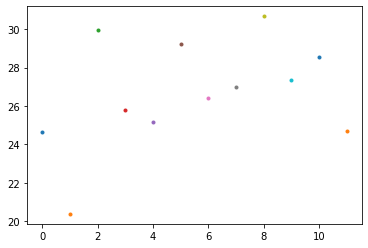

In [9]:
for temp_key in temp_sort_data:
    temp_sort_data[temp_key] = np.array(temp_sort_data[temp_key])
    plt.plot(temp_key, temp_sort_data[temp_key].mean(), '.')

In [11]:
seq = "GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGYGGGPGGGNFGGSPGYGGGRGGYGGGGPGYGNQGGGYGGGYDNYGGGNYGSGNYNDFGNYNQQPSNYGPMKSGNFGGSRNMGGPYGGGNYGPGGSGGSGGYGGRSRY"
hnrnap_analyzer.set_sequence(seq)

In [16]:
dirrr = '/home/adria/perdiux/prod/lammps/dignon/hnRPA/RE-T-hnRPA/xtc_temper0.xtc'
topo = '/home/adria/perdiux/prod/lammps/dignon/hnRPA/RE-T-hnRPA/hps_trj.pdb'
md.load(dirrr, top=topo)

<mdtraj.Trajectory with 20001 frames, 152 atoms, 1 residues, and unitcells at 0x7eff3c1dc950>